# Task 1 - Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

## 1. Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
data = pd.DataFrame(reviews,columns=['reviews'])
data.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


In [4]:
data.to_csv("BA_reviews.csv")

## 2. Data Cleaning

In [5]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from textblob import TextBlob
from wordcloud import WordCloud


- Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language. It supports classification, tokenization, stemming, tagging, parsing, and semantic reasoning functionalities.

In [6]:
#Creating a new dataframe to work on called df
df = pd.read_csv('BA_reviews.csv')

#Splitting reviews into verification status and the review
df = df.reviews.str.split('|',expand=True)

#Renaming columns 
df.rename(columns = {0:'verified',1:'review'}, inplace = True)
df.head()

#Removing spaces in reviews
df.review.str.strip()

0      My family and I have flown mostly on British A...
1      This has been by far the worst service I have ...
2      In Nov 2022 I booked and paid for a return jou...
3      BA is not treating its premium economy passeng...
4      24 hours before our departure on BA059 to Cape...
                             ...                        
995    Glasgow to Miami via London. Glasgow to Heathr...
996    London Heathrow to Budapest. After so much dis...
997    Budapest to London Heathrow. The flight depart...
998    London to Toronto. Group of 10 people age from...
999    Madrid to Heathrow. I fly with BA on a regular...
Name: review, Length: 1000, dtype: object

In [7]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   verified  1000 non-null   object
 1   review    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


,count,unique,top,freq
verified,1000,3,✅ Trip Verified,801
review,1000,1000,My family and I have flown mostly on British...,1


In [8]:
df.isna().sum()

verified    0
review      0
dtype: int64

- There are no null values

In [9]:
df.verified.value_counts()

✅ Trip Verified     801
Not Verified        197
❎ Not Verified        2
Name: verified, dtype: int64

In [10]:
#Replacing Not verified with 0 and Verified with 1
df.verified[df.verified.str.find('Not Verified') >=0] = 'Unverified_review'
df.verified[df.verified.str.find('Trip Verified') >=0] = 'Verified_review'

#Check the number of verified and unverified values
df.verified.value_counts(normalize=True)

Verified_review      0.801
Unverified_review    0.199
Name: verified, dtype: float64

In [11]:
#Removing special characters and numbers from the review column, only keeping the alphabets
df['cleaned_reviews'] = df['review'].str.replace('[^\w\s]','')
df.head()

,verified,review,cleaned_reviews
0,Verified_review,My family and I have flown mostly on British...,My family and I have flown mostly on British...
1,Verified_review,This has been by far the worst service I hav...,This has been by far the worst service I hav...
2,Verified_review,In Nov 2022 I booked and paid for a return j...,In Nov 2022 I booked and paid for a return j...
3,Unverified_review,BA is not treating its premium economy passen...,BA is not treating its premium economy passen...
4,Verified_review,24 hours before our departure on BA059 to Ca...,24 hours before our departure on BA059 to Ca...


In [12]:
verified_status = df['verified']

In [13]:
df.drop(['review','verified'],inplace=True,axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [15]:
df.head()

,cleaned_reviews
0,My family and I have flown mostly on British...
1,This has been by far the worst service I hav...
2,In Nov 2022 I booked and paid for a return j...
3,BA is not treating its premium economy passen...
4,24 hours before our departure on BA059 to Ca...


## 3.Tokenization
It is splitting the input data into a sequence of meaningful parts which are called tokens.

In [16]:
print(df['cleaned_reviews'][0])

  My family and I have flown mostly on British Airways for the last 30 years I am a priority passenger and fly often enough to recognise cabin crew and know some by name They used to be a really good airline to fly with Things have really deteriorated with their face to face customer care since the pandemic The aircraft look worn For example on my flight back my audiovisual equipment did not work and had to be reset twice finally working in the last hour before we landed The second time around I think the reset was done for the whole aircraft The touch screen function on my screen did not work The USB charger ports on my seat did not work The staff were pleasant enough but their service oozed mediocrity  There did not seem to be much pride in what they were doing The food has been the worst part on our BA flights since the pandemic They gave us a menu asked what wed like did a check and then told us that it was not available as they had run out and would we like to choose something els

In [17]:
df['cleaned_reviews'] = df.apply(lambda x: nltk.word_tokenize(x['cleaned_reviews']), axis=1)
print(df['cleaned_reviews'][0])

['My', 'family', 'and', 'I', 'have', 'flown', 'mostly', 'on', 'British', 'Airways', 'for', 'the', 'last', '30', 'years', 'I', 'am', 'a', 'priority', 'passenger', 'and', 'fly', 'often', 'enough', 'to', 'recognise', 'cabin', 'crew', 'and', 'know', 'some', 'by', 'name', 'They', 'used', 'to', 'be', 'a', 'really', 'good', 'airline', 'to', 'fly', 'with', 'Things', 'have', 'really', 'deteriorated', 'with', 'their', 'face', 'to', 'face', 'customer', 'care', 'since', 'the', 'pandemic', 'The', 'aircraft', 'look', 'worn', 'For', 'example', 'on', 'my', 'flight', 'back', 'my', 'audiovisual', 'equipment', 'did', 'not', 'work', 'and', 'had', 'to', 'be', 'reset', 'twice', 'finally', 'working', 'in', 'the', 'last', 'hour', 'before', 'we', 'landed', 'The', 'second', 'time', 'around', 'I', 'think', 'the', 'reset', 'was', 'done', 'for', 'the', 'whole', 'aircraft', 'The', 'touch', 'screen', 'function', 'on', 'my', 'screen', 'did', 'not', 'work', 'The', 'USB', 'charger', 'ports', 'on', 'my', 'seat', 'did', 

## 3.Removing Stopwords
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

In [18]:
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df.head(20))

                                      cleaned_reviews
0   My family I flown mostly British Airways last ...
1   This far worst service I plane Its obvious fly...
2   In Nov 2022 I booked paid return journey New Z...
3   BA treating premium economy passengers respect...
4   24 hours departure BA059 Cape Town Heathrow Th...
5   We arrived Heathrow 0600 find flight Ibiza can...
6   Original flight cancelled explanation There re...
7   Airport check functionary little warmth effici...
8   Flight fine Inline competitors Pleasant crew O...
9   Came Glasgow London took connecting flight Ame...
10  My flight 12 May 2023 got delayed hour 25 minu...
11  Cairo 5 hour flight BA considers short haul ev...
12  After travelling London Madrid British Airways...
13  My luggage mistagged Dallas way Cairo via Lond...
14  The airline lost luggage absolutely awful thro...
15  We booked BA website round trip flights Seattl...
16  First time flying BA business class never Ther...
17  You buy sandwiches crisp

## 4.Polarity Analysis
Polarity refers to the degree of positivity or negativity in a given text. Polarity analysis is used to determine the sentiment of a text, whether it is positive, negative, or neutral.

In [19]:
df['polarity'] = df.apply(lambda x: TextBlob(x['cleaned_reviews']).sentiment.polarity, axis=1)
print(df.head())

                                     cleaned_reviews  polarity
0  My family I flown mostly British Airways last ...  0.157778
1  This far worst service I plane Its obvious fly... -0.063542
2  In Nov 2022 I booked paid return journey New Z...  0.129545
3  BA treating premium economy passengers respect...  0.000000
4  24 hours departure BA059 Cape Town Heathrow Th... -0.048167


## 5.Sentiment Tags

In [20]:
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
    
df['sentiment_tag'] = df['polarity'].apply(tag_cal)
print(df.head())

                                     cleaned_reviews  polarity sentiment_tag
0  My family I flown mostly British Airways last ...  0.157778      Positive
1  This far worst service I plane Its obvious fly... -0.063542      Negative
2  In Nov 2022 I booked paid return journey New Z...  0.129545      Positive
3  BA treating premium economy passengers respect...  0.000000       Neutral
4  24 hours departure BA059 Cape Town Heathrow Th... -0.048167      Negative


## 6.Analysing the data

### i) Verified reviews VS Unverified reviews

In [21]:
# Number of verified vs unverified reviews
verified_status.value_counts()

Verified_review      801
Unverified_review    199
Name: verified, dtype: int64

In [22]:
# % of verified vs unverified reviews

verification_distribution = verified_status.value_counts(normalize=True)*100
print(verification_distribution)

Verified_review      80.1
Unverified_review    19.9
Name: verified, dtype: float64


There are 80.4% of verified reviews and 19.6% of unverified reviews

### ii) Sentiment tag distribution

In [23]:
# number of sentiments in each tag
df.sentiment_tag.value_counts()

Positive    646
Negative    340
Neutral      14
Name: sentiment_tag, dtype: int64

In [24]:
# % division of sentiment tags
Sentiment_division = df.sentiment_tag.value_counts(normalize=True)*100
print(Sentiment_division)

Positive    64.6
Negative    34.0
Neutral      1.4
Name: sentiment_tag, dtype: float64


## 7.Visualizating the results

### i) Verified reviews VS Unverified reviews

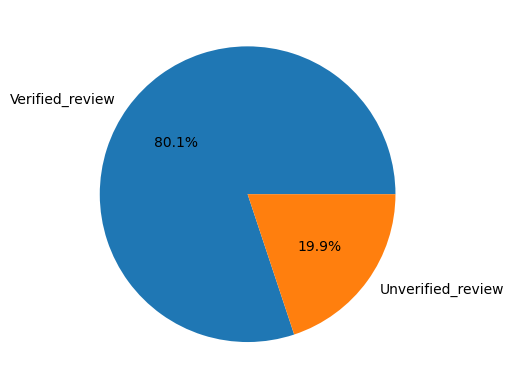

In [25]:
plt.pie(x=verification_distribution,labels=verification_distribution.index,autopct='%1.1f%%')
plt.show()

### ii) Sentiment tag distribution

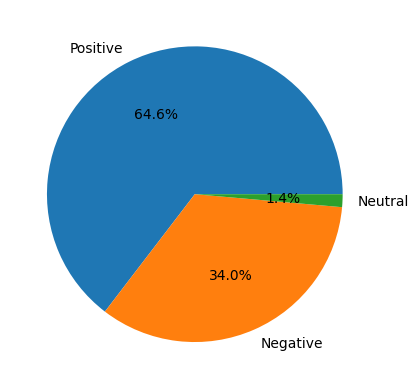

In [26]:
plt.pie(x=Sentiment_division,labels=Sentiment_division.index,autopct='%1.1f%%')
plt.show()

### iii) Wordcloud

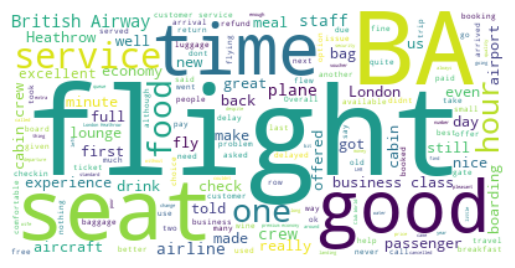

In [27]:
#Positive Wordcloud
textp = " "
for i in df.index:
    if df['sentiment_tag'][i] == "Positive":
        textp = textp + df['cleaned_reviews'][i]
      
wordcloud_positive = WordCloud(background_color="white").generate(textp)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

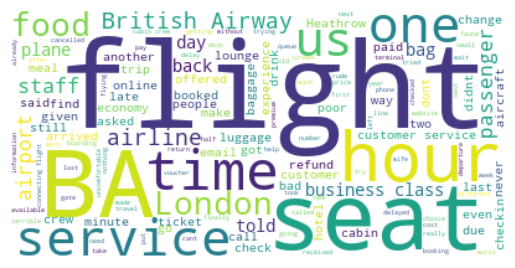

In [28]:
#Negative Wordcloud
textn = " "
for i in df.index:
    if df['sentiment_tag'][i] == "Negative":
        textn = textn + df['cleaned_reviews'][i]
      
wordcloud_negative = WordCloud(background_color="white").generate(textn)


# Display the generated image:
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

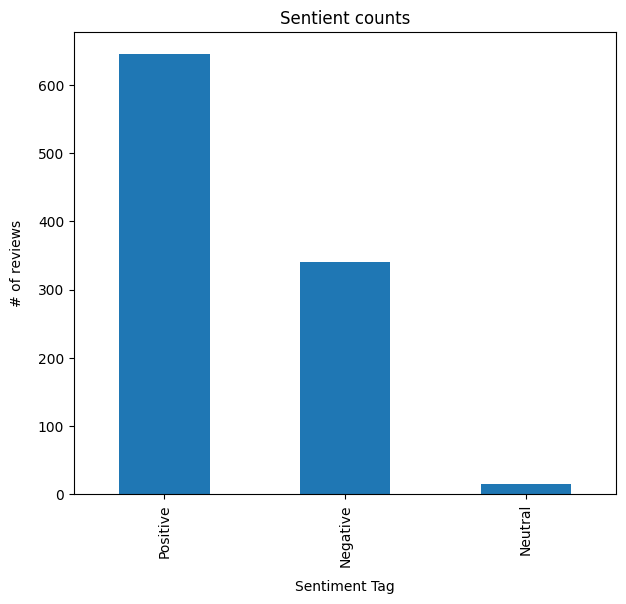

In [29]:
df['sentiment_tag'].value_counts().plot(kind='bar', figsize=(7, 6))
plt.xlabel("Sentiment Tag", labelpad=10)
plt.ylabel("# of reviews", labelpad=10)
plt.title("Sentient counts")
plt.show()